In [28]:
#import required library
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import warnings
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

In [59]:
#import tweets file
tweets = pd.read_csv("tweet_result.csv",names = ["date","tweet"])

lets take a look at dataset

In [60]:
tweets.head()

,date,tweet
0,2019-04-28 23:59:59,b'RT @RahulGandhi: Our farmers are our pride &...
1,2019-04-28 23:59:57,b'RT @dhruv_rathee: Tej Bahadur is looking all...
2,2019-04-28 23:59:56,b'RT @KanchanGupta: Which law made by PM Modi ...
3,2019-04-28 23:59:55,b'RT @rvaidya2000: Ramayana stamps released by...
4,2019-04-28 23:59:48,b'RT @free_thinker: Republic TV falsely portra...


## Removing Twitter Handles (@user)

In [61]:
#We will use this function to remove the pattern ‘@user’ from all the tweets in our data.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [62]:
# remove twitter handles (@user)
tweets['tidy_tweet'] = np.vectorize(remove_pattern)(tweets['tweet'], "@[\w]*")

## Removing Punctuations, Numbers, and Special Characters

Here we will replace everything except characters and hashtags with spaces.

In [63]:
# remove special characters, numbers, punctuations
tweets['tidy_tweet'] = tweets['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

## Removing Short Words which are not usefull

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [64]:
tweets['tidy_tweet'] = tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

Let’s take another look at the first few rows of the combined dataframe.

In [65]:
tweets.head(10)

,date,tweet,tidy_tweet
0,2019-04-28 23:59:59,b'RT @RahulGandhi: Our farmers are our pride &...,farmers pride strength past years Modi have tr...
1,2019-04-28 23:59:57,b'RT @dhruv_rathee: Tej Bahadur is looking all...,Bahadur looking become join opposition candida...
2,2019-04-28 23:59:56,b'RT @KanchanGupta: Which law made by PM Modi ...,Which made Modi says Tribals shot dead Tribals...
3,2019-04-28 23:59:55,b'RT @rvaidya2000: Ramayana stamps released by...,Ramayana stamps released Modi https FNrur
4,2019-04-28 23:59:48,b'RT @free_thinker: Republic TV falsely portra...,Republic falsely portrays praising Modi Congre...
5,2019-04-28 23:59:47,b'RT @PChidambaram_IN: Mr Modi thinks he can r...,Modi thinks rule India keeping people state fe...
6,2019-04-28 23:59:47,"b""PM Modi addresses National Traders' Conventi...",Modi addresses National Traders Convention nht...
7,2019-04-28 23:59:44,b'RT @dhruv_rathee: Tej Bahadur is looking all...,Bahadur looking become join opposition candida...
8,2019-04-28 23:59:43,b'@JhaSanjay Jis din asi Hawa chali samaj lo k...,Hawa chali samaj Puri Hawa polluted breath tha...
9,2019-04-28 23:59:40,"b""RT @shenaz_irani: Modi's age as on date 68 y...",Modi date Modi Tales spent home nBegged nWas u...


## Tokenization of tweets

tokenize all the cleaned tweets in dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [66]:
tokenized_tweet = tweets['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [farmers, pride, strength, past, years, Modi, ...
1    [Bahadur, looking, become, join, opposition, c...
2    [Which, made, Modi, says, Tribals, shot, dead,...
3     [Ramayana, stamps, released, Modi, https, FNrur]
4    [Republic, falsely, portrays, praising, Modi, ...
Name: tidy_tweet, dtype: object

## Stemming the words

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [67]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [farmer, pride, strength, past, year, modi, ha...
1    [bahadur, look, becom, join, opposit, candid, ...
2    [which, made, modi, say, tribal, shot, dead, t...
3         [ramayana, stamp, releas, modi, http, fnrur]
4    [republ, fals, portray, prais, modi, congress,...
Name: tidy_tweet, dtype: object

**stitching these tokens back together**

In [44]:
#for i in range(len(tokenized_tweet)):
    #tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

#tweets['tidy_tweet'] = tokenized_tweet

## What story tweets are saying

common words used in the tweets: WordCloud

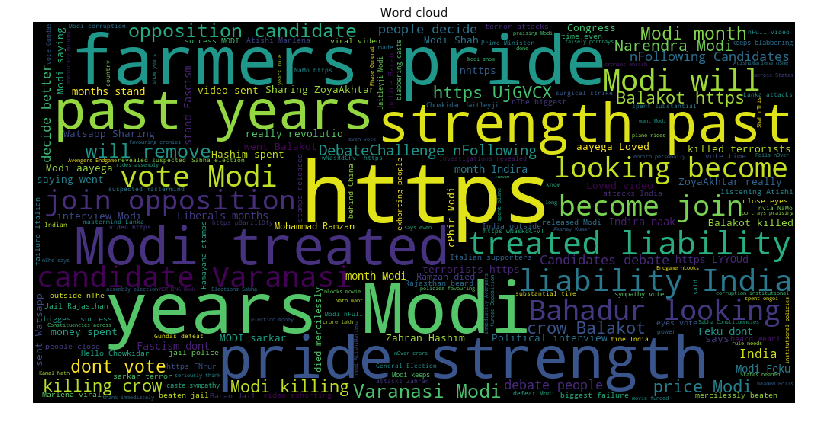

In [104]:
from wordcloud import WordCloud, STOPWORDS
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=1000, height=500,stopwords=stopwords,random_state = 100,max_font_size=110).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(15,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Word cloud")
wordcloud(tweets,'tidy_tweet')

## Hashtags on tweets sentiment

In [71]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [72]:
#extracting hashtag from tweets
HT_regular = hashtag_extract(tweets['tidy_tweet'])
HT_regular = sum(HT_regular,[])

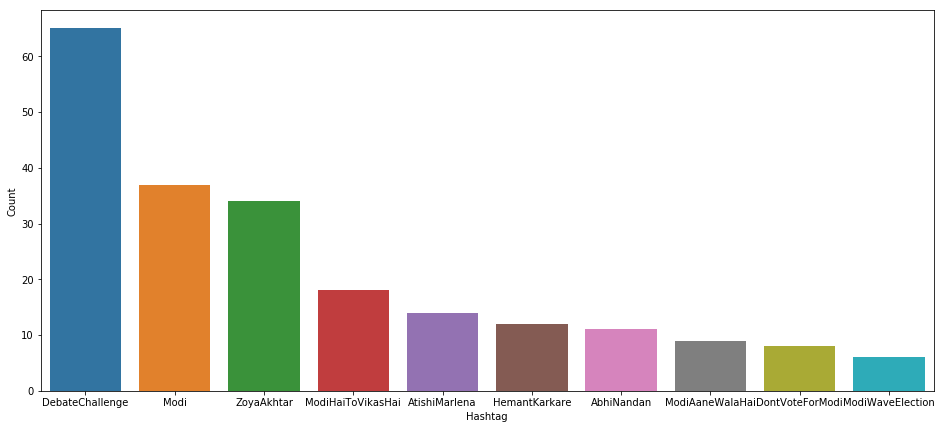

In [80]:
#plotting count of tweet vs hashtags
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [85]:
#converting date field into date formate
tweets['date'] =  pd.to_datetime(tweets['date'], format='%Y%m%d %H:%M:%S')

In [86]:
tweets.head()

,date,tweet,tidy_tweet
0,2019-04-28 23:59:59,b'RT @RahulGandhi: Our farmers are our pride &...,farmers pride strength past years Modi have tr...
1,2019-04-28 23:59:57,b'RT @dhruv_rathee: Tej Bahadur is looking all...,Bahadur looking become join opposition candida...
2,2019-04-28 23:59:56,b'RT @KanchanGupta: Which law made by PM Modi ...,Which made Modi says Tribals shot dead Tribals...
3,2019-04-28 23:59:55,b'RT @rvaidya2000: Ramayana stamps released by...,Ramayana stamps released Modi https FNrur
4,2019-04-28 23:59:48,b'RT @free_thinker: Republic TV falsely portra...,Republic falsely portrays praising Modi Congre...
